Problem statement:

Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.
Here is the code to load the data
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
boston.data.shape

(506, 13)

In [4]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
#Describing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
#Setting up Housing Data for Linear Regression Analysis
#Create a DataFrame bos containing all the data to use in predicting Boston Housing prices
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Create a variable called PRICE which will contain the prices.
#This information is contained in the target data, that we want to predict using the linear model
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Get basic summary statistics for each of the columns
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Building the Regression Model

# Step 1: Checking for Linearity through Scatterplots
Looking into the relationships between the variables and price.
In order to create a linear model, the predictors or features that we use must have a linear relationship to price


Text(0.5,1,'Relationship between RM and Price')

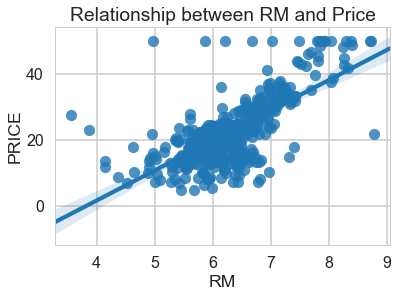

In [9]:
#Number of Rooms 
#Strong positive coorelation, as the number of rooms increase/decrease, the housing price increases/decreases
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.title("Relationship between RM and Price")

Text(0.5,1,'Relationship between LSTAT and Price')

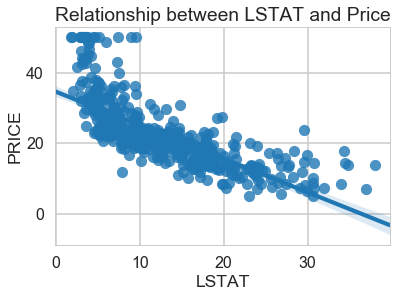

In [10]:
#% of Lower Status Population
#Strong negative coorelation, the more/less the population consists of lower status individuals,housing price decreases/increases.
sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True)
plt.title("Relationship between LSTAT and Price")

Text(0.5,1,'Relationship between NOX and Price')

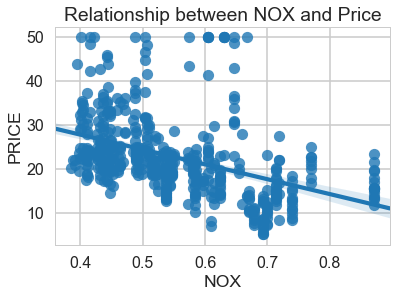

In [11]:
#Nitrus Oxide Concentration (in parts per 10 million)
#Strong negative coorelation, the more/less concentrated NOX is in the air, the lower/higher the price of housing
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)
plt.title("Relationship between NOX and Price")

Text(0.5,1,'Relationship between DIS and Price')

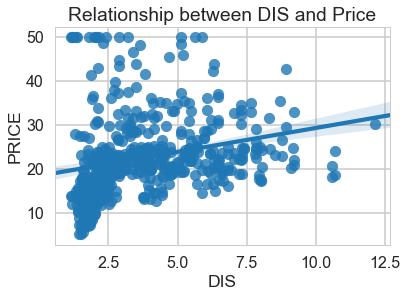

In [12]:
#Weighted Distance from 5 Major Employment Centers
#Strong positive coorelation, the closer/further the town is from employment centers, the higher/lower the housing price
sns.regplot(y="PRICE", x="DIS", data=bos, fit_reg = True)
plt.title("Relationship between DIS and Price")

Text(0.5,1,'Relationship between PTRATIO and Price')

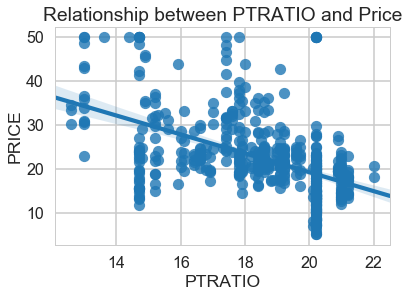

In [13]:
#Pupil Teacher Ratio
#As the number of students increases for every teacher, the value of housing decreases
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)
plt.title("Relationship between PTRATIO and Price")

Text(0.5,1,'Relationship between Crime Rate and Price')

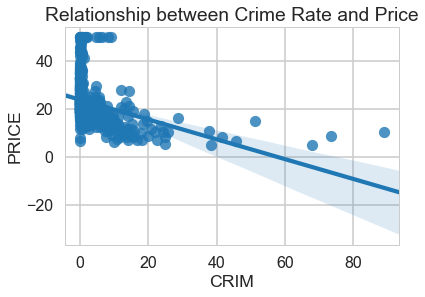

In [14]:
#Crime Rate
#As them crime rate decreases/increases, the housing price increases/decreases
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)
plt.title("Relationship between Crime Rate and Price")

# Step 2: Checking for Normality through Histograms
Now we have some possible variables that we can use to predict price. The next assumption we will check is that the values are normally distributed, if they are not we will transform the data so that it is normally distributed 

Taking the log of the data helps to normalize the data and eliminate any skew in the distribution to make patterns more visible and data more interprettable

Text(0.5,1,'Adjusted Crime Rate vs. Original Prices')

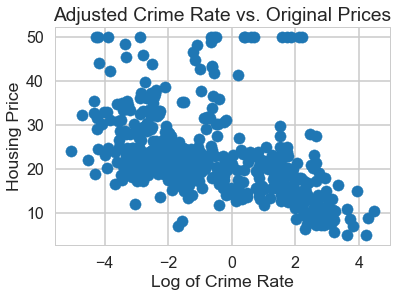

In [15]:
#Adjusting the Crime Rate Feature
#As per Crime Rate and Price graph, price exhibits exponential decay. This can be coorected by taking log of Crime Rate so that it has a linear relationship with price
x = np.log(bos.CRIM)
plt.scatter(x, bos.PRICE)

plt.xlabel("Log of Crime Rate")
plt.ylabel("Housing Price")
plt.title("Adjusted Crime Rate vs. Original Prices")

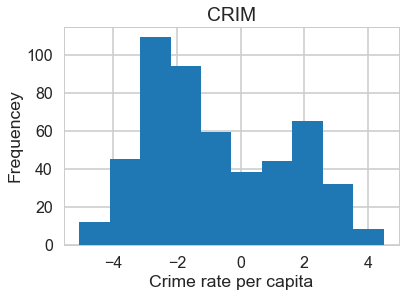

In [16]:
#Crime Rate now has a normal distribution
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

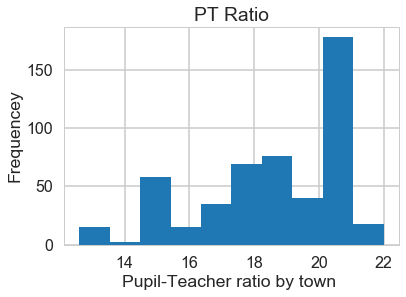

In [17]:
#Distribution of PTRATIO
plt.hist(bos.PTRATIO)
plt.title("PT Ratio")
plt.xlabel("Pupil-Teacher ratio by town ")
plt.ylabel("Frequencey")
plt.show()

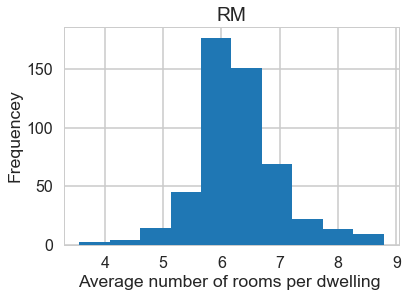

In [18]:
#Distribution of RM
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling ")
plt.ylabel("Frequencey")
plt.show()

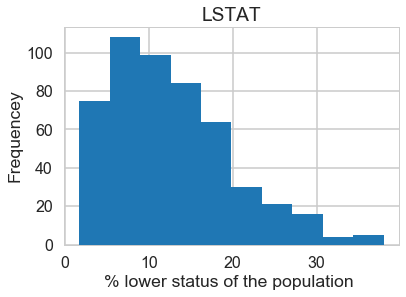

In [19]:
#Distribution of LSTAT
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% lower status of the population ")
plt.ylabel("Frequencey")
plt.show()

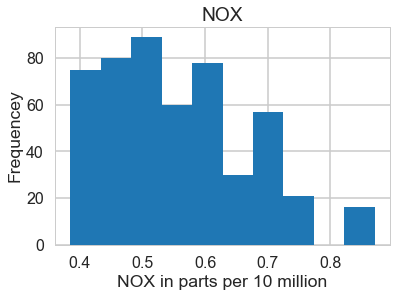

In [20]:
#Distribution of NOX
plt.hist(bos.NOX)
plt.title("NOX")
plt.xlabel("NOX in parts per 10 million")
plt.ylabel("Frequencey")
plt.show()

In [33]:
#updating the dataframe with normalization operation
bos1 = bos
bos1['CRIM'] = np.log(bos1['CRIM'])

# Step 3: Checking for coorelation among features through Coorelation Matrix

In [34]:
bos1 = bos
bos1['CRIM'] = np.log(bos1['CRIM'])
df = bos1.iloc[:, [0,4,5,7,10,12]]
df.corr()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
CRIM,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,1.000000,-0.302188,-0.769230,0.188933,0.590879
RM,NaN,-0.302188,1.000000,0.205246,-0.355501,-0.613808
DIS,NaN,-0.769230,0.205246,1.000000,-0.232471,-0.496996
PTRATIO,NaN,0.188933,-0.355501,-0.232471,1.000000,0.374044
LSTAT,NaN,0.590879,-0.613808,-0.496996,0.374044,1.000000


We drop CRIM due to high coolinearity

# Step 4: Developing Linear Regression model

Y = boston housing prices

and

X = all the other features (or independent variables, predictors)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.

In [28]:
#Fitting Linear Regression using statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

bos1 = bos
bos1['CRIM'] = np.log(bos1['CRIM'])

m = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 31 Dec 2018   Prob (F-statistic):          3.67e-131
Time:                        14:25:40   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

Interpreting coefficients

The p-value (under P>|t|) is so small, basically zero. This means that our selected features are a statistically significant predictor of PRICE.

The LARGEST regression coefficient is for RM of 4.1633 means that on average, each additional room is associated with a price increase of about $4,163

Intrepretting R-squared

R-squared percentage tells us how much of variance in y can be explained by the model we have created, the higher the percent the more the model fits our data. 

0.70 R-squared means 70% percentage of the total variance in the price can be explained by our linear regression model. It means almost 3/4ths of the variability can be attributed to our model, which is high. 

We have a well fit model!


Text(0.5,1,'Predictions vs. Original Prices')

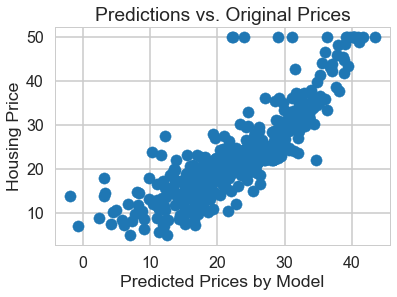

In [35]:
#Evaluating the Fit of our Model
predicted_prices = m.fittedvalues

plt.scatter(predicted_prices, bos.PRICE)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

We created a scatterplot between the predicted prices, available in m.fittedvalues (where m is the fitted model) and the original prices. We evaluate this plot to see how well our regression model predicts price of given the data in our bos data set.

A perfect model would get us a scatterplot where all the data lies on the 45 degree line. That would mean that x = y, and every predicted price would have equalled the actual price.

Below the Original Prices of 20, the predictions are very widely distributed along the predicted pricing axis, meaning that as the actual prices decrease, the predictions are not as accurate as they are as the prices increase above this. The model seems to be underpredicting the price, as the data falls below the 45 degree line.

There are some major outliers, below ~10 and above ~30 on predicted prices

END OF ASSIGNMENT